In [32]:
import numpy as np
embeddings_file = "/home/rohan/Documents/projects/interspecies_money/data/crops_and_embeddings/martha_bwindi/embeddings/embeddings.npy"
iids_file = "/home/rohan/Documents/projects/interspecies_money/data/crops_and_embeddings/martha_bwindi/embeddings/individual_ids.npy"
# if image visualization wanted, they can be loaded from files_names.npy in corresponding folder

embeddings = np.load(embeddings_file)
ids = np.load(iids_file)
print(embeddings.shape)
print(ids.shape)

(138, 256)
(138,)


In [33]:
from collections import defaultdict
import json
import os
import pandas as pd
    
individual_ids = np.array(ids)

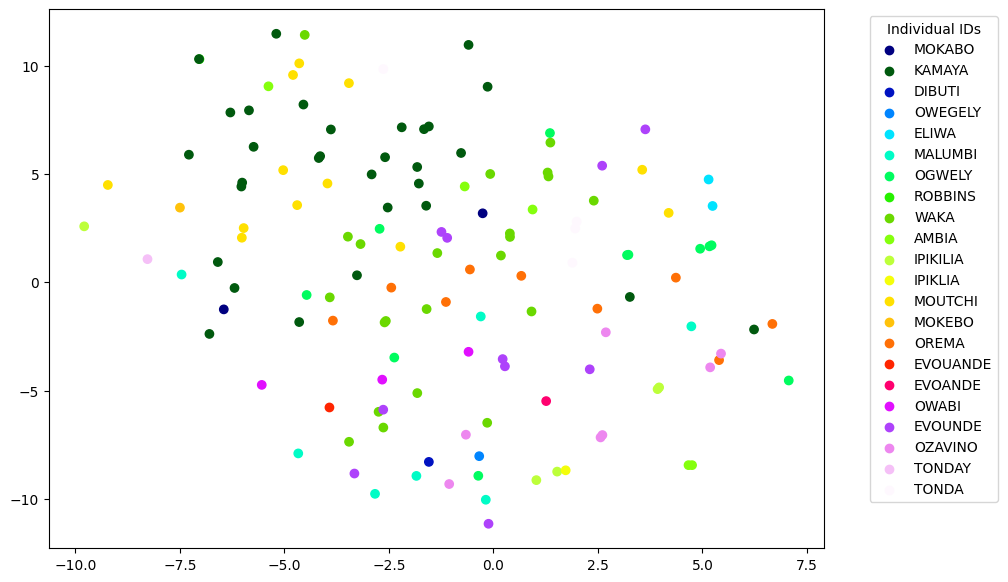

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# TODO filter db entries of individuals that are not in the dataset?

# Fit the TSNE model to the embeddings
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(embeddings)


colors = plt.cm.get_cmap("gist_ncar", len(set(individual_ids)))
individual_ids_num_map = {ind: i for i, ind in enumerate(set(individual_ids))}
c = [individual_ids_num_map[ind] for ind in individual_ids]
plt.figure(figsize=(10, 7))  # Adjust the figure size if needed
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=c, cmap=colors)
legend_labels = {ind: colors(individual_ids_num_map[ind]) for ind in set(individual_ids)}
for label, color in legend_labels.items():
    plt.scatter([], [], color=color, label=label)

# Position the legend outside the plot
plt.legend(title="Individual IDs", bbox_to_anchor=(1.05, 1), loc='upper left')

In [35]:
# Cluster (without doing PCA before)
%pip install scikit-learn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# pca = PCA(n_components=32)
# embeddings = pca.fit_transform(embeddings)

kmeans = KMeans(n_clusters=21)
kmeans.fit(embeddings)

num_imgs_per_cluster = {} # {cluster_id: num_imgs}

iid_cluster_ids = defaultdict(list) # {img_idx: cluster_id}
for img_idx, cluster_id in enumerate(kmeans.labels_):
    img_iid = ids[img_idx]
    if cluster_id not in num_imgs_per_cluster:
        num_imgs_per_cluster[cluster_id] = 1
    else:
        num_imgs_per_cluster[cluster_id] += 1
    iid_cluster_ids[img_iid].append(cluster_id)


individuals_per_cluster = defaultdict(list) # {cluster_id: [individual_ids]}
for iid, cluster_ids in iid_cluster_ids.items():
    for cluster_id in set(cluster_ids):
        individuals_per_cluster[cluster_id].append(iid)

num_individuals_per_cluster = [len(set(individual_ids)) for individual_ids in individuals_per_cluster.values()]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/rohan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# Evaluate cluster quality
num_clusters_per_individual = [len(set(cluster_ids)) for cluster_ids in iid_cluster_ids.values()]
print("Average number of clusters per individual: ", np.mean(num_clusters_per_individual))
print("Average number of individuals per cluster: ", np.mean(num_individuals_per_cluster))


print("Number of individuals per cluster")
# for each cluster print num of sindivudlas/total individuals in each cluster
for cluster_id, individual_ids in individuals_per_cluster.items():
    num_imgs_in_cluster = num_imgs_per_cluster[cluster_id]
    print(f"Cluster {cluster_id}: Containes images from {len(set(individual_ids))}/{len(set(iid_cluster_ids.keys()))} individuals. Total images in cluster: {num_imgs_in_cluster}")


Average number of clusters per individual:  3.5
Average number of individuals per cluster:  3.6666666666666665
Number of individuals per cluster
Cluster 6: Containes images from 4/22 individuals. Total images in cluster: 6
Cluster 8: Containes images from 2/22 individuals. Total images in cluster: 3
Cluster 12: Containes images from 7/22 individuals. Total images in cluster: 13
Cluster 7: Containes images from 7/22 individuals. Total images in cluster: 14
Cluster 16: Containes images from 2/22 individuals. Total images in cluster: 3
Cluster 1: Containes images from 6/22 individuals. Total images in cluster: 13
Cluster 2: Containes images from 5/22 individuals. Total images in cluster: 9
Cluster 9: Containes images from 4/22 individuals. Total images in cluster: 7
Cluster 13: Containes images from 3/22 individuals. Total images in cluster: 6
Cluster 14: Containes images from 4/22 individuals. Total images in cluster: 9
Cluster 15: Containes images from 4/22 individuals. Total images in 